# INTRODUCCIÓN


---

En el siguiente escrito se analizará de manera exploratoria la base de datos "Diamantes.csv" que contiene 10 variables, 3 cualitativas y 7 cuantitativas para cicuenta y tres mil novecientos cuarenta diamantes (53.940). Se evidencia en los datos un aprendizaje supervisado que contiene tareas de regresión puesto que utiliza el conjunto de datos etiquetados para entrenar un algoritmo para  para predecir el "precio" del diamante dado que es un atributo númerico.


#  2. ANÁLISIS EXPLORATORIO


---



###2.1 DESCRIPCIÓN VARIABLES


---





La base de datos "Diamantes.csv" contiene 53.940 datos con 10 variables 
diferentes las cuales son: 

1.   Cut : Variable cualitativa que indica la calidad del corte (Fair, Good, Very Good, Premium, Ideal) del diamante.

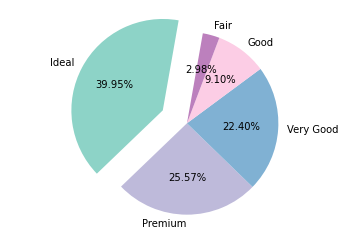

Como se evidencia en el pie chart, la calidad de corte que más se tiene en el diamante es la "ideal" con 39.95%  y la que menos tiene es la calidad de corte "fair" con tan solo el 2.98%.
2. Color : Variable cualitativa que indica el color del diamante desde "D" que es el mejor, hasta "J" que es el peor.

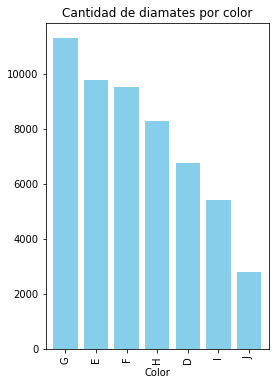

Como se evidencia en el diagrama de barra, hay más diamantes de que color "G" y menos diamantes de color "J

3. Clarity : Variable cualitativa que indica la claridad del diamante (I1 (peor), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (mejor)).

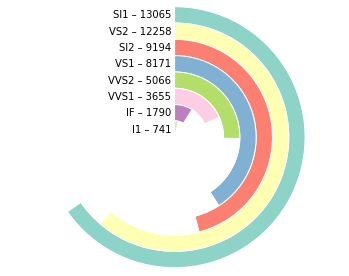

Como se evidencia en el Radial bar chart, 1790 diamantes tienen la claridad "IF" que es una claridad muy buena y tan solo 741 diamantes tienes la claridad I1 que es la peor.


4. x : Variable cuantitativa que nos indica el largo del diamante en milimetros.
5. y :  Variable cuantitativa que nos indica el ancho del diamante en milimetros.
6. z :  Variable cuantitativa que nos indica la profundidad del diamante en milimetros.

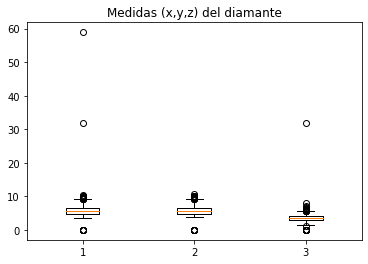

Como se evidencia en el boxplot. las tres vairalbe "x","y" y "z" presentan un comportamiento similar, donde se observa una distribución simétrica y tanto la media, mediana y moda coinciden. Además, se observa unos datos atípicos en cada una de las variables.
7. Depth : Variable cuantitativa que indica el porcentaje de profundidad total = z / media (x, y) = 2 * z / (x + y) (43–79)
8. Table : Variable cuantitativa que indica el ancho de la parte superior del diamante en relación con el punto más ancho 
9. Carat: Variable cuantitativa que nos indica el peso del diamante en kilates.

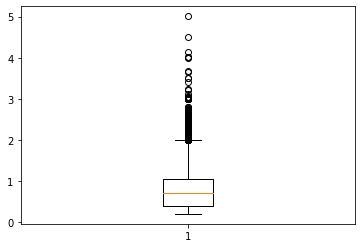

Como se observa en el gráfico, la media de la variable "Carat" se encuentra entre 0 y1 1, además, se observan muchos datos atípicos.

10. price: Variable cuantitativa que indica el precio del diamante (US dollars)

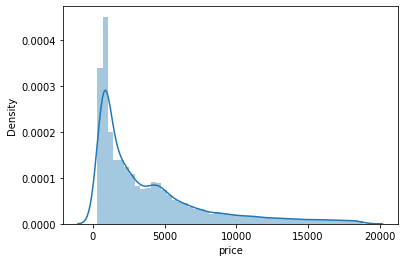

Como se observa en el histrograma, la variable "Price" presenta 
una asimetría positiva, además, algunos picos.







### 2.2 MATRIZ DE CORRELACIONES

---

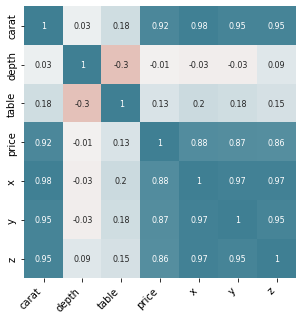

De las variables que componen la base de datos podemos ver que la gran mayoría posee una correlación por encima del 86% con el precio de los diamantes a excepción del porcentaje total de profundidad (depth) y la anchura de la parte superior del diamante en relación con el punto más ancho (table); que poseen una correlación por debajo de 20% lo que se considera como una correlación muy baja. Por este comportamiento, dichas variables serán excluidas del análisis que se realizará para el pronóstico del precio del diamante.



## 2.3 VISUALIZACIONES

---

**Pairplot**
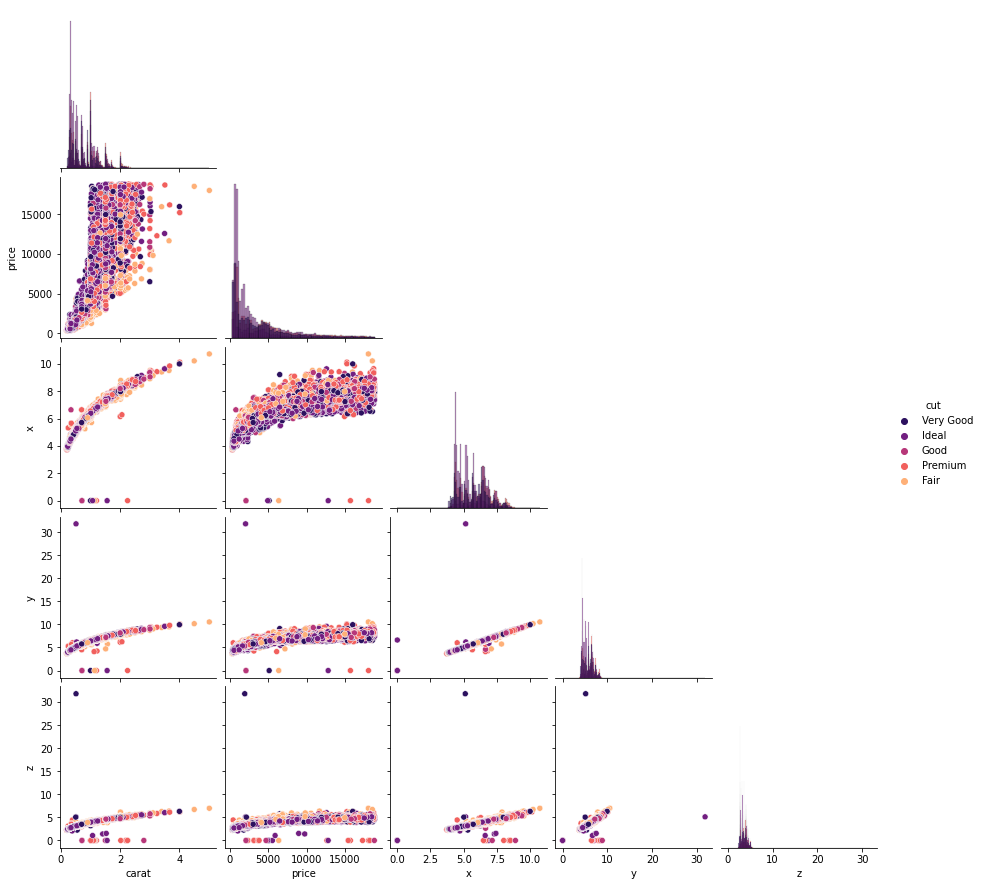

Al analizar las relaciones que se presentan entre la variables que componen la base de datos se tiene que entre el precio y peso del diamante existe una relación que se comporta de forma exponencial; esto se debe a que entre más mínimo sea el aumento en el kilate del diamante el precio aumenta de forma considerable.





**Precio promedio del diamante según color y corte.**
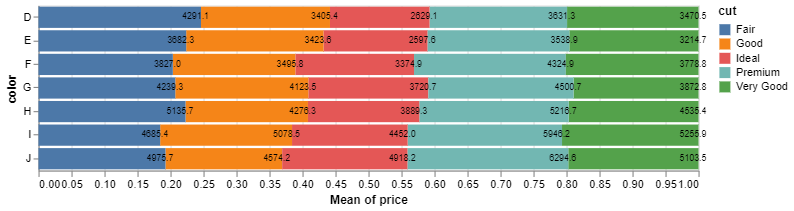

En relación a las características físicas del diamante como su color y corte; se puede concluir que en general el corte de diamantes Fair es el que mayor precio promedio posee; por otro lado no siempre que se tiene que un diamante con mejor color es posible que posea un mejor precio promedio.


**Cantidad de diamantes por tipo de corte 8**.

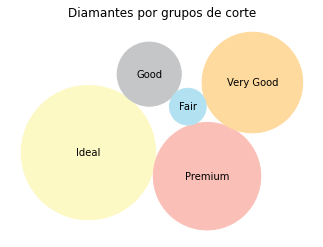

Con base en el gráfico se puede ver cómo la base está compuesta en mayor parte con diamantes que poseen cortes Ideal, Premium y very good; por otrlo lado el corte que posee menos información es decir del que se tiemen menor cantidad de unidaes registradas es el Fair.

# 3. ANEXOS 

---




### 3.1 IMPORTACIÓN BASE DE DATOS

In [36]:
!pip install -U -q PyDrive

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np
import seaborn as sns
from google.colab import drive
from matplotlib import cm
import altair as alt
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
diamonds = pd.read_csv('/content/drive/MyDrive/PROYECTO PYTHON/Diamonds.csv', 
                 sep = ',',
                 error_bad_lines=False,
                 dtype={
                     'cut': str, 'color':str , 'clarity':str ,'x':float, 'y':float, 'z':float
                 })

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


### 3.2  DESCRIPCIÓN BASE DE DATOS

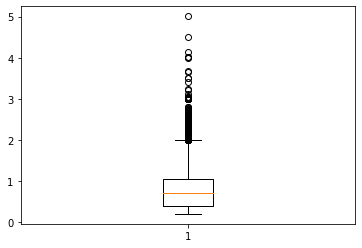

In [39]:
tab2 = diamonds['carat']
ax = plt.boxplot(tab2 )

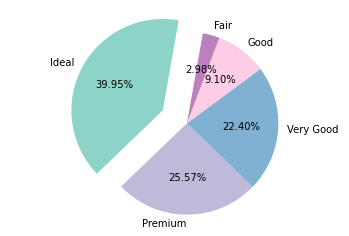

In [40]:
tab1 = diamonds['cut'].value_counts().rename_axis('label').reset_index(name='counts')
explode = (0.3, 0, 0,0,0)
#create colors along a chosen colormap
labels = tab1['label']
data = tab1['counts']
#number of data points
n = 5
colors = [cm.Set3(i / n) for i in range(n)]

fig1, ax1 = plt.subplots()
ax1.pie(tab1['counts'],
        labels=tab1['label'],
        explode = explode, # saca 1 porción del pie
        colors = colors,
        autopct='%1.2f%%', # formato para lo númro redondeados a 2 decimales
        shadow=False, 
        startangle=80, # Empieza el gráfico en 80°
       )
ax1.axis('equal') 

plt.show()

Text(0.5, 1.0, 'Cantidad de diamates por color')

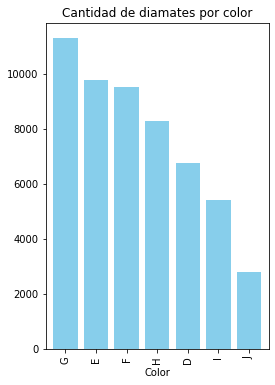

In [41]:

tab4 = diamonds['color'].value_counts().rename_axis('Color')
tab4.plot(kind = 'bar',
             width=0.8,
             subplots=True,
             figsize=(4,6), color = 'skyblue')
plt.title('Cantidad de diamates por color')


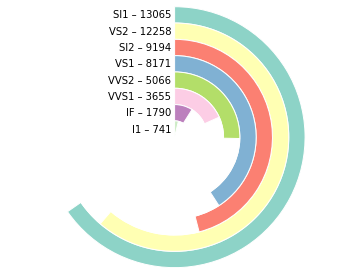

In [42]:
from numpy.ma.core import log10
tab5 = diamonds['clarity'].value_counts().rename_axis('label').reset_index(name='counts')

labels = tab5['label']
data = tab5['counts']
#number of data points
n = len(data)
#find max value for full ring
k = 10 ** int(log10(max(data)))
m = k * (1 + max(data) // k)


#radius of donut chart
r = 1.5
#calculate width of each ring
w = r / n 


#create colors along a chosen colormap
colors = [cm.Set3(i / n) for i in range(n)]

#create figure, axis
fig, ax = plt.subplots()
ax.axis("equal")

#create rings of donut chart
for i in range(n):
    #hide labels in segments with textprops: alpha = 0 - transparent, alpha = 1 - visible
    innerring, _ = ax.pie([m - data[i], 
                           data[i]], 
                          radius = r - i * w, 
                          startangle = 90, 
                          labels = ["", labels[i]], 
                          labeldistance = 1 - 1 / (1.5 * (n - i)), 
                          textprops = {"alpha": 0}, 
                          colors = ["white", colors[i]])
    plt.setp(innerring, 
             width = w, 
             edgecolor = "white")
    radius = r - i * w
    plt.text(0, radius - w / 2, f'{labels[i]} – {data[i]} ', ha='right', va='center')
    
#plt.legend()
plt.show()


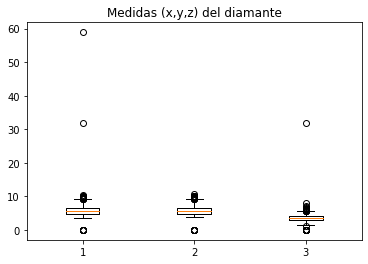

In [43]:
data =[diamonds['y'], 
       diamonds['x'],
       diamonds['z']]
plt.boxplot(data)
plt.title("Medidas (x,y,z) del diamante")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


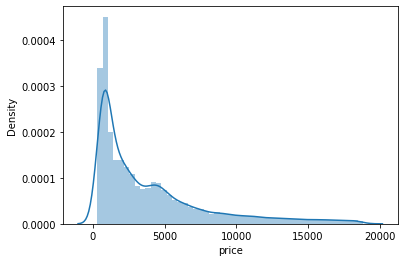

In [44]:
sns.distplot(diamonds['price']);

###3.3 MATRIZ DE CORRELACIONES

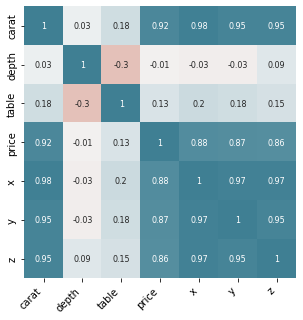

In [45]:
# Heatmap matriz de correlaciones
cor =pd.DataFrame(round(diamonds.corr(),2))
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.heatmap(
    cor,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

###3.4 VISUALIZACIONES

In [46]:
diamonds_2 = diamonds.drop(['depth','table'],axis=1)

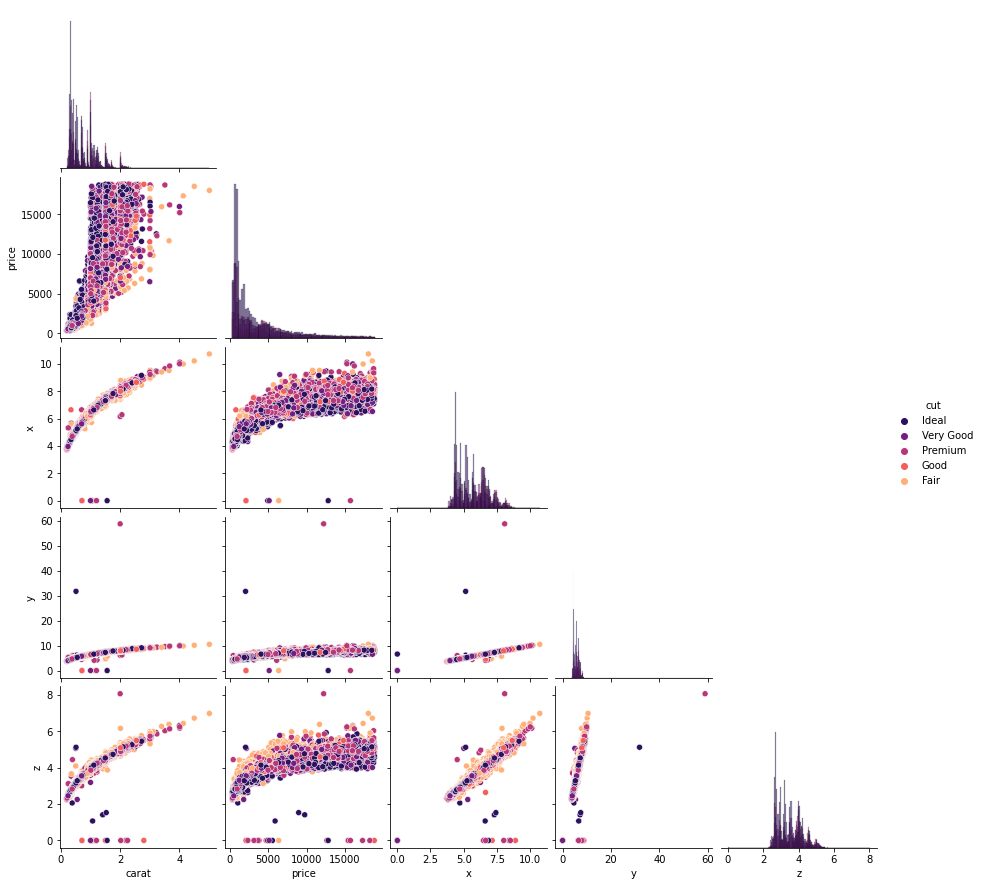

In [47]:
sample_df = diamonds_2.sample(50000)
sns.pairplot(sample_df, 
             hue="cut", 
             corner = True, 
             diag_kind="hist",
             palette = "magma" )

In [48]:
alt.data_transformers.disable_max_rows()
bars = alt.Chart(diamonds_2).mark_bar().encode( # marce de barras
    x=alt.X('mean(price):Q', # media de la duracion de l mes :Q --> variable cuantitativa.
            stack = "normalize"), # normalizar los datos los convierte a porcentaje.
    y=alt.Y('color:N'),
    color=alt.Color('cut')
) # capa de barras
text = alt.Chart(diamonds_2).mark_text(dx=-5, dy=0, color='black',size = 8).encode( # marca de texto, números pequeños dento de las barras; mark .text cambiar los paraámeteros de los números.
    x=alt.X('mean(price):Q',
            stack='normalize'),
    y=alt.Y('color:N'),
    detail='cut:N',
    text=alt.Text('mean(price):Q', format='.1f') # valor a imprimir en las etiqueta que le van a poner a las barras
) # capa de texto
chart = bars + text # suma d elas 2 capas para que aparexcan en 1.
chart.properties(
    width=600,
    height=150
)

alt.LayerChart(...)

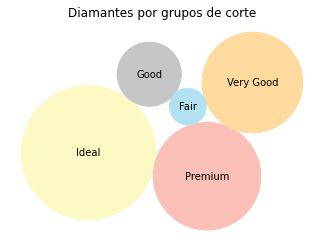

In [49]:
tab6 = diamonds['cut'].value_counts().rename_axis('label').reset_index(name='counts')
browser_market_share = {
    'Tipo_corte': list(tab6['label']),
    'Diamonds':list(tab6['counts']),
    'color': [ '#fdf9c4', '#fabfb7', '#ffda9e', '#c5c6c8', '#b2e2f2']
}


class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        """
        Setup for bubble collapse.

        Parameters
        ----------
        area : array-like
            Area of the bubbles.
        bubble_spacing : float, default: 0
            Minimal spacing between bubbles after collapsing.

        Notes
        -----
        If "area" is sorted, the results might look weird.
        """
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        idx_min = np.argmin(distance)
        return idx_min if type(idx_min) == np.ndarray else [idx_min]

    def collapse(self, n_iterations=50):
        """
        Move bubbles to the center of mass.

        Parameters
        ----------
        n_iterations : int, default: 50
            Number of moves to perform.
        """
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        """
        Draw the bubble plot.

        Parameters
        ----------
        ax : matplotlib.axes.Axes
        labels : list
            Labels of the bubbles.
        colors : list
            Colors of the bubbles.
        """
        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center')


bubble_chart = BubbleChart(area=browser_market_share['Diamonds'],
                           bubble_spacing=0.1)

bubble_chart.collapse()

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
bubble_chart.plot(
    ax, browser_market_share['Tipo_corte'], browser_market_share['color'])
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title('Diamantes por grupos de corte')

plt.show()

In [50]:
diamonds.isna

<bound method DataFrame.isna of        carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]>

# REFERENCIAS


---




https://data.world/mrawrawk/diamonds
